In [1]:
from pathlib import Path
from PIL import Image
from torch.utils.data import Dataset
from numpy import random
import torchvision
import torch
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [3]:
# path ( basic directory, no args ) . glob ( test,train,dev / all.jpg )
image_path_list = list((Path("../data/facades/").glob("*/*")))

Random image path: ..\data\facades\test\28.jpg
Image height: 256
Image width: 512


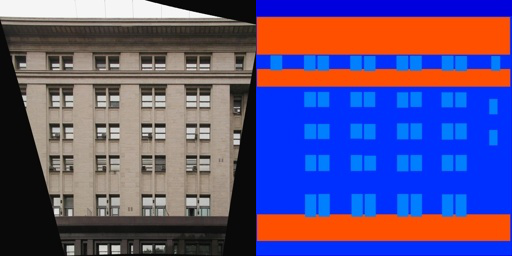

In [48]:
random_image_path = random.choice(image_path_list)

img = Image.open(random_image_path)

# plan is now to split these down the middle
print(f"Random image path: {random_image_path}")
print(f"Image height: {img.height}") 
print(f"Image width: {img.width}")
img

In [104]:
class Facades(Dataset):
    
    def __init__(self, targ_dir: str) -> None:
        self.paths = list(Path(targ_dir).glob("*/*")) 
        self.transforms1 = transforms.Compose(
            [transforms.Resize(256),
            transforms.ToTensor(),
            transforms.Normalize(
                [0.5 for _ in range(3)], [0.5 for _ in range(3)]
            )]
        )
        self.transforms2 = transforms.Compose([
            transforms.Resize(size=(286, 286)),
            transforms.RandomCrop(size=(256, 256)),
        ])
    
    def load_image(self, idx: int) -> Image.Image:
        image_path = self.paths[idx]
        return Image.open(image_path)
    
    def __len__(self) -> int:
        return len(self.paths)
    
    def __getitem__(self, idx: int) -> torch.Tensor:
        img = self.load_image(idx)
        
        img_ten = self.transforms1(img)

        real = img_ten[:, :, :256]
        input = img_ten[:, :, 256:]

        real = self.transforms2(real)
        input = self.transforms2(input)

        return real, input

In [105]:
facade = Facades("../data/facades/")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


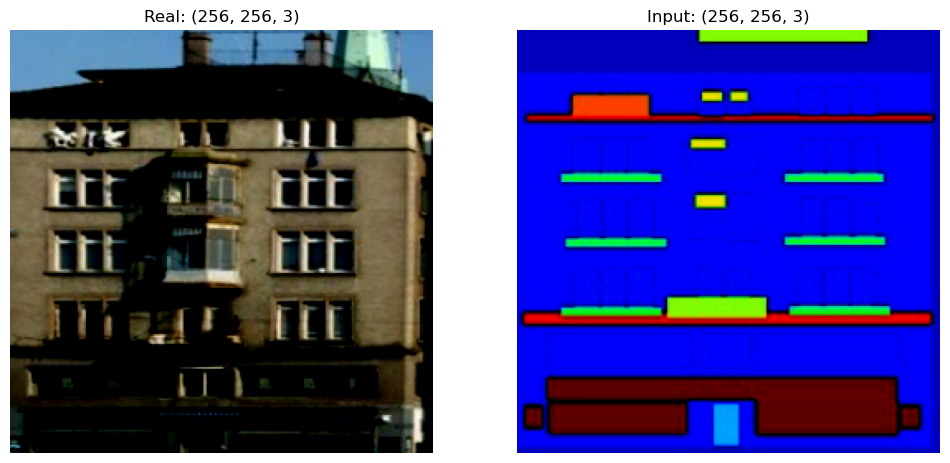

In [113]:
real, input = facade[random.randint(0, len(facade))]

real_array = real.numpy()
real_array = np.transpose(real_array, (1, 2, 0))

input_array = input.numpy()
input_array = np.transpose(input_array, (1, 2, 0))

_, axarr = plt.subplots(1,2, figsize=(12, 6))
axarr[0].imshow(real_array)
axarr[1].imshow(input_array)

axarr[0].title.set_text(f"Real: {real_array.shape}")
axarr[1].title.set_text(f"Input: {input_array.shape}")

axarr[0].axis('off')
axarr[1].axis('off')
plt.show()